In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
dataFrame=pd.read_csv(r"Zomato data .csv")
dataFrame

name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            800          Buffet  
3                            300          Buffet  
4                            600          Buffet  
..                           ...             ...  
143                          100          Dining  
144                          150          Dining  
145                          450          Dining  
146                          800          Dining  
147                          200          Dining  

[148 rows x 7 columns]

In [39]:
dataFrame.head()

name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet

In [41]:
dataFrame.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [43]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)
dataFrame['rate']=dataFrame['rate'].apply(handleRate)
print(dataFrame)

                      name online_order book_table  rate  votes  \
0                    Jalsa          Yes        Yes   4.1    775   
1           Spice Elephant          Yes         No   4.1    787   
2          San Churro Cafe          Yes         No   3.8    918   
3    Addhuri Udupi Bhojana           No         No   3.7     88   
4            Grand Village           No         No   3.8    166   
..                     ...          ...        ...   ...    ...   
143       Melting Melodies           No         No   3.3      0   
144        New Indraprasta           No         No   3.3      0   
145           Anna Kuteera          Yes         No   4.0    771   
146                 Darbar           No         No   3.0     98   
147          Vijayalakshmi          Yes         No   3.9     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            800          

Text(0.5, 0, 'Types of restaurent')

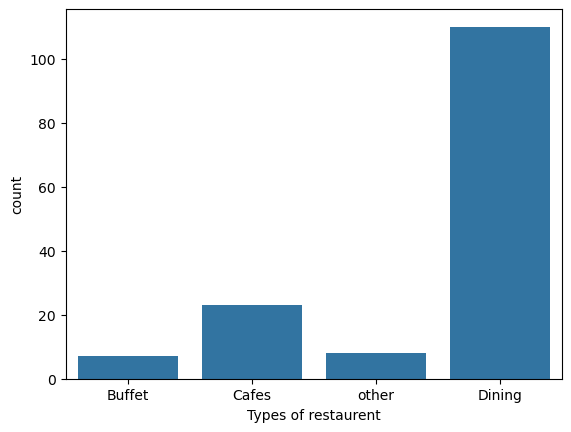

In [33]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Types of restaurent")

votes

Text(0, 0.5, 'votes')

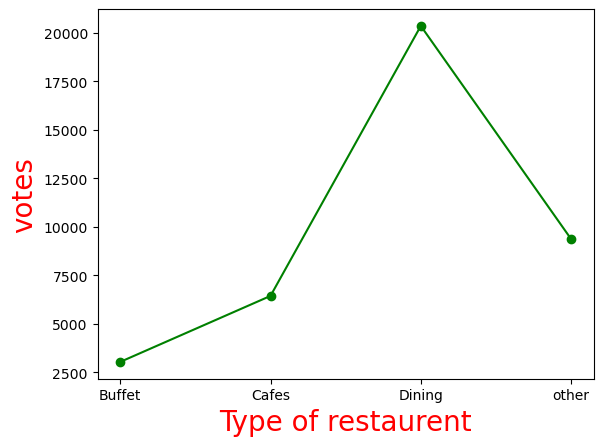

In [61]:
groupedData=df.groupby('listed_in(type)')['votes'].sum()
groupedData
result=pd.DataFrame({'votes':groupedData})
plt.plot(result,c='green',marker='o')
plt.xlabel('Type of restaurent',c='red',size=20)
plt.ylabel('votes',c='red',size=20)                 

In [69]:
max_votes=dataFrame['votes'].max()
restaurent_with_max_votes=dataFrame.loc[dataFrame['votes']==max_votes,'name']
print('Restaurent with max votes is : ',restaurent_with_max_votes)

Restaurent with max votes is :  38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='count', ylabel='online_order'>

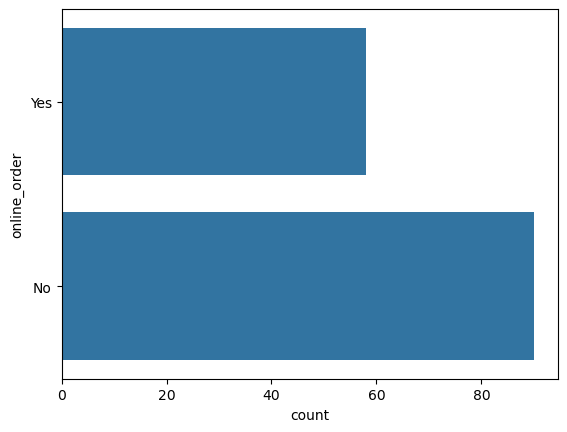

In [73]:
sns.countplot(dataFrame['online_order'])


Text(0.5, 1.0, 'Rating distribution')

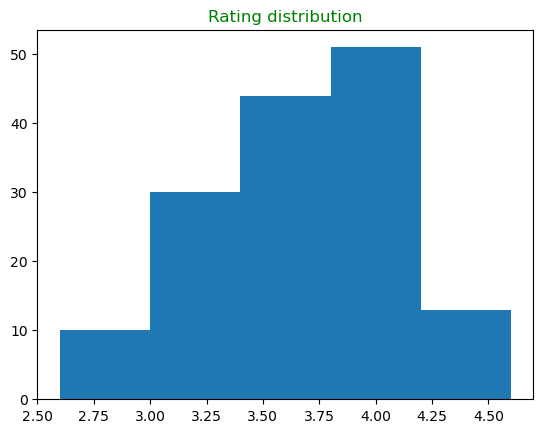

In [89]:
plt.hist(dataFrame['rate'],bins=5)
plt.title("Rating distribution",c="green")


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

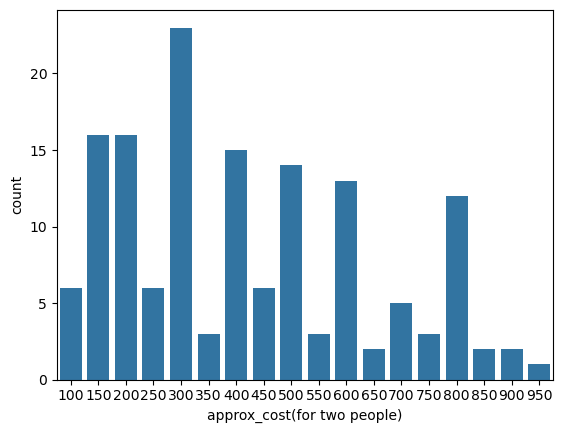

In [97]:
couple_data=dataFrame['approx_cost(for two people)']
sns.countplot(x=couple_data)


<Axes: xlabel='online_order', ylabel='rate'>

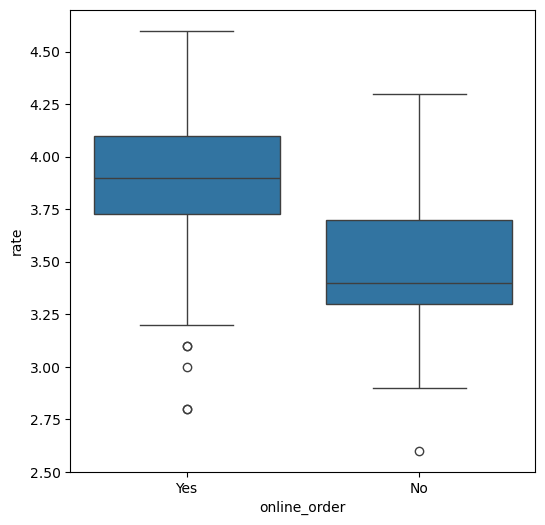

In [119]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y = 'rate',data=dataFrame)

Text(0.5, 1.0, 'Hmap')

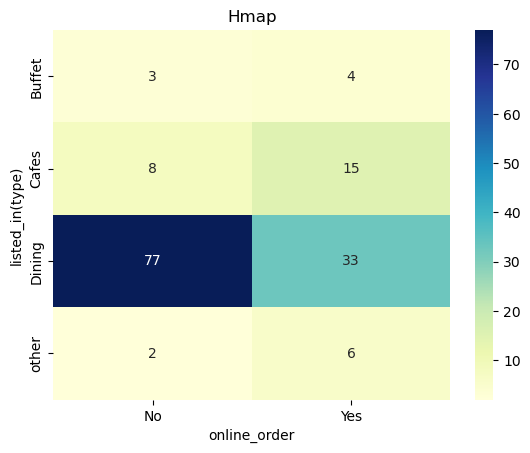

In [135]:
pivot_table=dataFrame.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='d')
plt.title('Hmap')

CONCLUSION:DINING RESTAURENTS PRIMARILY ACCEPT ONLINE ORDERS COMPARED TO OFFLINE WHILE CAFES ARE ACCEPTING INLINE ORDERS MOST
and online orders are getting good ratings compared to offline.Approximate cost for couples is 300RS. most ratings are 3.5 to 4.more number of customers are preferring offline orders compared to online.